# Testing a Perceptual Phenomenon
###Project 1

# Introduction

The data that I have observed and analyzed in this project is from a Stroop Effect experiment with 24 participants, each of who were timed while saying out loud the color of each written word in two different lists: a congruent and an incongruent one. The congruent list is composed of color names, where each name is written in the color it represents. The incongruent list is also composed of color names, but none of the names are written in the colors that they represent.

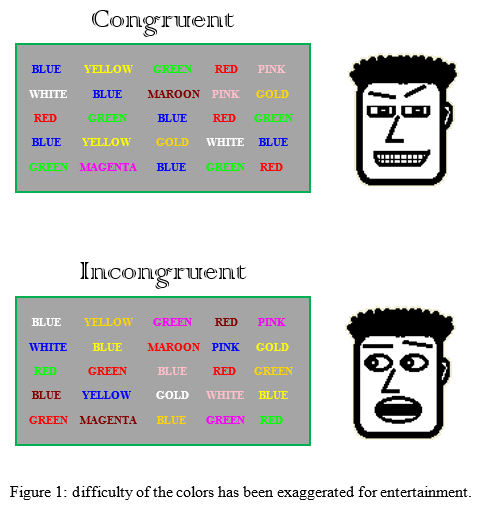

In [1]:
from IPython.display import Image

Image(filename='Project_1__Figure_1.png')

# Variables

The independent variable in this experiment is the given conditions: a congruent list and an incongruent list. The two lists are the same for all participants and do not change.

The dependent variable is the amount of time it takes a participant to say all the colors of the written color names in each list. This variable depends on the individual’s performance and what the task is.

# Hypotheses and Statistical Test

A set of hypotheses that can be made for this experiment include the null hypothesis, H_0, and the alternate hypothesis, H_A. The null hypothesis indicates that there is no differences between the two conditions. This means that the population average time for vocalizing the colors on the congruent list will not be significantly different from the population average time for vocalizing the colors on the incongruent list. The null hypothesis is only meant to be rejected by finding that it is not true; hence, an alternate hypothesis, where a remarkable difference between the two conditions is expected.

The alternate hypothesis indicates that there is a significant difference between the two conditions. This means that, for instance, the population average time for saying the name of every color seen on the incongruent list is going to be greater than the population average time for the congruent list. This is also going to be my own alternate hypothesis, because I believe that it is reasonable that all participants will probably have to take more time to determine and say each color in the incongruent list. They’ll have to avoid reading the words, which are the names of other colors, and perhaps even double-check. The incongruent list will require more concentration, so we can easily assume that it will take longer.

H_0:  E[Time_congruent] ≈ E[Time_incongruent]

H_A:  E[Time_congruent] < E[Time_incongruent]

The statistical test that I have planned to use is the dependent samples, one-tailed t-test. The two conditions are dependent on the same person carrying them out. The result for each condition has to be from the same person, or we won't get the correct average difference from each participant. Many are just better at performing both tasks than others. Some participants' slowest time could be faster than some other participants' fastest time, which means that if we mixed their results, we'd have useless, imaginary data. It may even be that some participants will perform faster with the incongruent list (that's part of what we're testing to see). The one-tailed test will be used for checking the validity of the H_A, alternative hypothesis, where the expected value of time taken to say out loud the names of the colors observed in the congruent list takes less time than the incongruent list. If the alternate hypothesis is correct, then the null hypothesis will be rejected.

# Data and Computation

Initializing the Script

In [2]:
import numpy as np
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import glob

init_printing();
%matplotlib inline

data = pd.DataFrame()

for f in glob.glob("./stroopdata.csv"):
    DF = pd.read_csv(f)
    data = data.append(DF,ignore_index=True)
    
# We'll need participant numbers for the x-values of the plots.
data['Participants'] = pd.Series(list(range(len(data)))) + 1

The Experiment Data

In [5]:
data

,Congruent,Incongruent,Participants
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


A Better Look at the Data

In [6]:
data.describe()

,Congruent,Incongruent,Participants
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,12.500000
std,3.559358,4.797057,7.071068
min,8.630000,15.687000,1.000000
25%,11.895250,18.716750,6.750000
50%,14.356500,21.017500,12.500000
75%,16.200750,24.051500,18.250000
max,22.328000,35.255000,24.000000


Sample Size

In [7]:
n = len(data); n                          # n = 24

Expected Value of the Congruent List

In [8]:
Mu_c = data['Congruent'].mean()          # Mu_c = 14.051125

N(Mu_c, 4)

Expected Value of the Incongruent List

In [9]:
Mu_i = data['Incongruent'].mean()        # Mu_i = 22.0159166667

N(Mu_i, 4)

Point Estimate

In [10]:
PE = Mu_i - Mu_c                         # PE = -7.96479166667

N(PE, 3)

Sample Standard Deviation of the Congruent List

In [11]:
S_c = data['Congruent'].std()            # S_c = 3.5593579576451981

N(S_c, 3)

Sample Standard Deviation of the Incongruent List

In [12]:
S_i = data['Incongruent'].std()          # S_i = 4.7970571224691536

N(S_i, 3)

Sample Standard Deviation of the Differences

In [13]:
S = 0
for i in range(n):
    S = S + (((data['Congruent'][i] - data['Incongruent'][i]) - (Mu_c - Mu_i))**2)/(n-1)
    
S = sqrt(S)                              # S = 4.86482691036

N(S, 3)

Sampling Distribution

In [14]:
SD = S/sqrt(n)                           # SD = 0.993028634778

N(SD, 2)

# Plots 

Box Plots

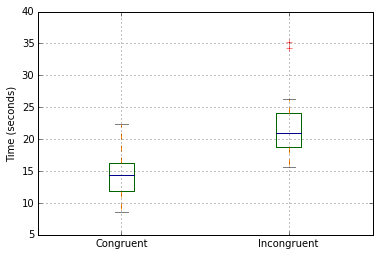

In [15]:
data.plot(x = 'Participants', 
          kind = 'box', 
          sym = 'r+', 
          color = dict(boxes = 'DarkGreen', 
                       whiskers = 'DarkOrange', 
                       medians = 'DarkBlue', 
                       caps = 'Gray')
         ).set_ylabel('Time (seconds)')

The box plots are a great way to see the whole picture, as each, conveniently, shows the min, lower quantile, median, upper quantile, and max of its respective list. It's visually apparent that, overall, the participants took much less time completing the task with the congruent list, than with the incongruent list. You may consider comparing the numbers below to the plots above.

Congruent List: min, lower quantile, median, upper quantile, and max

In [3]:
(data['Congruent'].min(), 
 data['Congruent'].quantile(.25), 
 data['Congruent'].quantile(.50), 
 data['Congruent'].quantile(.75), 
 data['Congruent'].max())

Incongruent List: min, lower quantile, median, upper quantile, and max

In [4]:
(data['Incongruent'].min(), 
 data['Incongruent'].quantile(.25), 
 data['Incongruent'].quantile(.50), 
 data['Incongruent'].quantile(.75), 
 data['Incongruent'].max())

Bar Plots

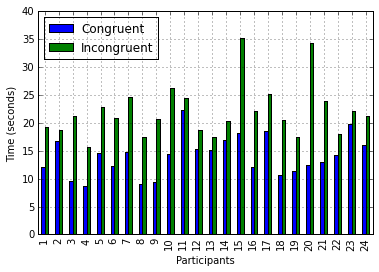

In [19]:
fig, ax = plt.subplots()

data.plot(x = 'Participants', 
          yerr = data.std(), 
          ax = ax, 
          kind = 'bar'
         ).set_ylabel('Time (seconds)')

The bar plots show that every participant performed faster with the congruent list than the incongruent list. This leaves us with no evidence for the case that the incongruent list might take less time to complete. In fact, we can see that most participants took a lot longer to complete the incongruent list compared to their own congruent list trial.

# Results

Where alpha = 0.05, confidence = 90%, and degree of freedom = n - 1 = 23,

t* = t_critical

In [20]:
t_critical = 1.714

t = t_statistical

In [21]:
t = (PE*sqrt(n))/S                       # t = 8.02070694411

N(t, 3)

t > t*

In [22]:
t > t_critical                           # 8.02 > 1.714

Where t = 8.02 and DF = 23,

The P value is less than 0.0001

Therefore, P < alpha.

The null hypothesis, H_0, has been rejected, since t_statistical is greater than t_critical (8.02 > 1.714) and the probability value is much less than the significance level. This means that it will most likely take the rest of the population more time to say out loud the names of the colors that they read from the incongruent list than the congruent list.

# Source

Student's t: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

P-value calculation: http://graphpad.com/quickcalcs/pValue2/